In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import zipfile
from PIL import Image
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
with zipfile.ZipFile("C:\\Users\\chakr\\Downloads\\archive.zip" ,'r') as zip_ref:
    zip_ref.extractall('C:\\Users\\chakr\\Downloads')

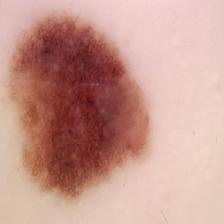

In [2]:
Image.open("C:\\Users\\chakr\\Downloads\\Cancer Dataset\\train\\Malignant\\95.jpg")

In [2]:
test_df=tf.keras.utils.image_dataset_from_directory(
directory = 'C:\\Users\\chakr\\Downloads\\Cancer Dataset\\test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))


Found 2000 files belonging to 2 classes.


In [3]:
train_df=tf.keras.utils.image_dataset_from_directory(
directory = 'C:\\Users\\chakr\\Downloads\\Cancer Dataset\\train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))


Found 11879 files belonging to 2 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_df = train_df.map(process)
test_df = test_df.map(process)

In [5]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
#     tf.image.stateless_random_brightness(0.2)

      
  ]
)


In [ ]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(6,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_df,epochs=20,validation_data=test_df)



Epoch 1/20


372/372 [==============================] - 741s 2s/step - loss: 1.1774 - accuracy: 0.6996 - val_loss: 0.5366 - val_accuracy: 0.7700
Epoch 2/20
372/372 [==============================] - 715s 2s/step - loss: 0.6397 - accuracy: 0.7303 - val_loss: 1.1605 - val_accuracy: 0.5705
Epoch 3/20
125/372 [=========>....................] - ETA: 7:59 - loss: 0.6230 - accuracy: 0.7563

In [24]:
model = tf.keras.Sequential([
  
    tf.keras.layers.Conv2D(kernel_size=(3, 3), padding='same', activation='relu',strides=(2,2),filters=20),
  tf.keras.layers.MaxPooling2D(),
   tf.keras.layers.Conv2D(kernel_size=(3, 3), padding='same', activation='relu',strides=(2,2),filters=20),
#    tf.keras.layers.MaxPooling2D(),
  
   tf.keras.layers.Conv2D(kernel_size=(3, 3), padding='same', activation='relu',strides=(2,2),filters=20),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='same'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#     model.add(BatchNormalization()),

  tf.keras.layers.MaxPooling2D(pool_size=(1,1),strides=2,padding='valid'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
#         model.add(BatchNormalization()),

  tf.keras.layers.MaxPooling2D(16, 3, padding='same'),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
#         model.add(BatchNormalization()),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),

      tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),

      tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(train_df,  epochs=15,validation_data=test_df)  

Epoch 1/15
372/372 [==============================] - 49s 123ms/step - loss: 0.5235 - accuracy: 0.7286 - val_loss: 0.6351 - val_accuracy: 0.6735
Epoch 2/15
372/372 [==============================] - 45s 120ms/step - loss: 0.4096 - accuracy: 0.8101 - val_loss: 0.3832 - val_accuracy: 0.8235
Epoch 3/15
372/372 [==============================] - 44s 118ms/step - loss: 0.3742 - accuracy: 0.8316 - val_loss: 0.3661 - val_accuracy: 0.8360
Epoch 4/15
372/372 [==============================] - 45s 119ms/step - loss: 0.3585 - accuracy: 0.8401 - val_loss: 0.3305 - val_accuracy: 0.8865
Epoch 5/15
372/372 [==============================] - 46s 124ms/step - loss: 0.3333 - accuracy: 0.8534 - val_loss: 0.2841 - val_accuracy: 0.8905
Epoch 6/15
372/372 [==============================] - 45s 120ms/step - loss: 0.3220 - accuracy: 0.8603 - val_loss: 0.2807 - val_accuracy: 0.8955
Epoch 7/15
372/372 [==============================] - 43s 114ms/step - loss: 0.3155 - accuracy: 0.8632 - val_loss: 0.2909 - val_ac

In [25]:
tf.keras.models.save_model(model,'cancer_detect.hdf5')

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('C:\\Users\\chakr\\cancer_detect.hdf5')

# Define a dictionary to map predicted class labels to flower names
cancer_label_dict = {0: 'benign', 1: 'Malignant'}

# Define a function to predict the flower type from an image
def predict_cancer(image):
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = loaded_model.predict(image)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Initialize the video capture object
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Break the loop if the frame cannot be read
    if not ret:
        break

    # Predict the flower type in the frame
    predicted_class = predict_cancer(frame)

    # Print the predicted flower type on the frame
    cv2.putText(frame, cancer_label_dict[predicted_class], (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Cancer Detector', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 44ms/step
